### Task
Image classification using Machine learning algorithms 

Yor task is the segmentation of database using machine learning algorithms
 - Take 2 numbers of your choice from MNIST database
 - Implement feature extraction on the chosen pic-data
 - Add labels to the pictures and show them
 - Declare a Supervised learning model and train it on train image-database
 - Test the algorithm on the test-database share your opinions on the result

(you can also use Unsupervised model and compare the results)

### Data
 - Train images: train-images.idx3-ubyte
 - Train image labels: train-labels.idx1-ubyte
 - Test images: t10k-images.idx3-ubyte
 - Test image labels: t10k-labels.idx1-ubyte


## -------------------- Solution -----------------

# Code Structure
I have divided my code into 3 sections:
-knn
-kmeans
-own algorithm(not complete yet) 

I started with data preprocessing for easier manipulation in further algorithms
This includes filtering the required data from train data+labels as well as filtering
the test data.

1)The knn algorithm showed very high accuracy in confusion matrix

2)The Kmeans with pixels sum and gray scale pixel average feature was relatively less accurate

3)My owm algorithm : main idea was to build a neural network which can process and identify
  28*28 grayscale image with only single object in it. I tried it for all the numbers at once.
  The loss was not that much as shown in the iterations. Overall i think it works better than expected

In [2]:
# útravalóra van szükségem :)
import numpy as np
from matplotlib import pyplot as plt
import idx2numpy
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

In [3]:
TRAIN_IMAGE_FILENAME = 'mnist_data/train-images.idx3-ubyte'
TRAIN_LABEL_FILENAME = 'mnist_data/train-labels.idx1-ubyte'
TEST_IMAGE_FILENAME = 'mnist_data/t10k-images.idx3-ubyte'
TEST_LABEL_FILENAME = 'mnist_data/t10k-labels.idx1-ubyte'

In [4]:
train_images = idx2numpy.convert_from_file(TRAIN_IMAGE_FILENAME)
train_labels = idx2numpy.convert_from_file(TRAIN_LABEL_FILENAME)
test_images = idx2numpy.convert_from_file(TEST_IMAGE_FILENAME)
test_labels = idx2numpy.convert_from_file(TEST_LABEL_FILENAME)

In [5]:
# Data preprocessing functions
# filter data for 2 numbers only based on already known labels
# just to reduce processing time
def get_new_labels(number1,number2,labels_data_set):
    number1_indexes = []
    number2_indexes = []
    i = 0
    for label in labels_data_set:
        if label == number1:
            number1_indexes.append(i)
        elif label == number2:
            number2_indexes.append(i)
        i+=1
    return number1_indexes,number2_indexes

# to make the classifying task easy i am making a sub data array
# that sub data array will contain image itself with the label
# eg: if image1 one is 0 and image2 is 1:  [[image1,0],[image2,1]....] etc
#this is used for training the model
def combine_data(data_array,number_value,image_data_set):
    filtered_data = []
    for i in range(len(data_array)-1):
        data = [image_data_set [data_array[i]],number_value]
        filtered_data.append(data)
    return filtered_data

def separate_sorted_data(data_set):
    image_data= []
    labels_data = []
    for data in data_set:
        image_data.append(data[0].flatten())
        labels_data.append(data[1])
    return image_data,labels_data
        
    

# KNN Algorithm implementation and checking accuracy with confusion Matrix

In [6]:
#enter two numbers for knn calculation (i tested the model mainly with 0 and 1):
number1 = 0
number2 = 1

In [7]:
#a,b = get_new_labels(0,1,train_labels) #train_labels
train_labels1, train_labels2 = get_new_labels(number1,number2,train_labels)
test_labels1, test_labels2 = get_new_labels(number1,number2,test_labels)

In [8]:
# i made a separate list consisting of only the required test and train images with the
train_data  = combine_data(train_labels1,number1,train_images) + combine_data(train_labels2,number2,train_images)# this data will be used to train our model
test_data = combine_data(test_labels1,number1,test_images) + combine_data(test_labels2,number2,test_images)

In [9]:
train_data_img,train_data_labels = separate_sorted_data(train_data)
test_data_img,test_data_labels = separate_sorted_data(test_data)
test_data_labels[130]

0

In [10]:
# knn implement
# best way to find the number of knn neighbor is to find sqrt of the total data set
knn_neighbors = int(math.sqrt(len(train_data)))
# its goo idea to have odd numbers for knn neighbors to avoid any problems during voting
if knn_neighbors%2 ==0 :
    knn_neighbors -=1
knn = KNeighborsClassifier(n_neighbors=knn_neighbors)

In [11]:
knn.fit(train_data_img,train_data_labels)

KNeighborsClassifier(n_neighbors=111)

In [12]:
predict_data = knn.predict(test_data_img)
predict_data

array([0, 0, 0, ..., 1, 1, 1])

In [13]:
confusion_matrix1 = confusion_matrix(test_data_labels,predict_data)
confusion_matrix1

array([[ 976,    3],
       [   0, 1134]], dtype=int64)

In [14]:
#testing data preprocessing functions
number = 1500
train_data[number][0];

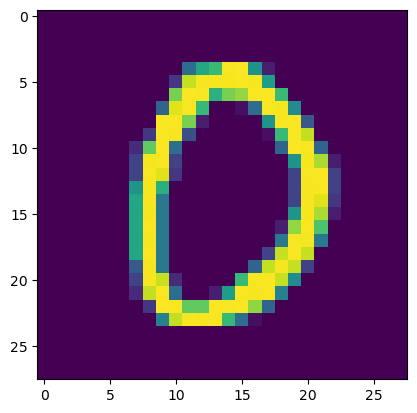

In [15]:
plt.imshow(train_data[number][0])

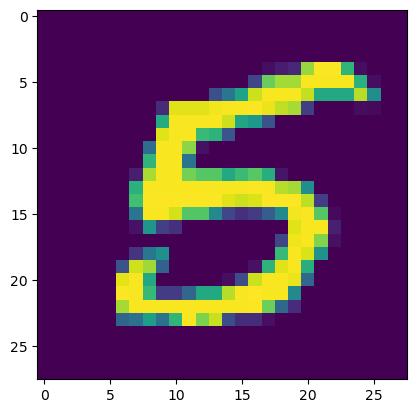

In [16]:
i=20000
plt.imshow(train_images[i])

In [17]:
train_labels[i]

5

# Unsupervised learning - feature extraction - statistics

Text(0.5, 1.0, 'Zeros')

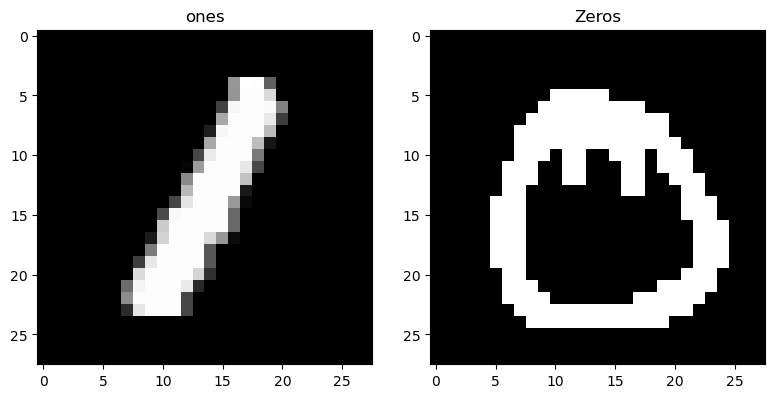

In [18]:
# Examining the data for feature extraction
# Data shows that generally 0 have more lighter pixels than 1
fig, axes = plt.subplots(1,2,figsize=(8,8))
fig.tight_layout()


axes[0].imshow(train_data_img[8500].reshape(28,28),'gray')
axes[0].set_title('ones')

axes[1].imshow(train_data_img[1000].reshape(28,28)>10,'gray')
axes[1].set_title('Zeros')

In [19]:
train_number1 = number1
train_number2 = number2


train_data_number1 = separate_sorted_data(combine_data(train_labels1,train_number1,train_images))[0]
train_data_number2 = separate_sorted_data(combine_data(train_labels2,train_number2,train_images))[0]


In [20]:
len(train_data_number1) == len(train_data_number2)

False

In [21]:
# FE: feature extraction
# at first glance if we convert the images to binary images
# and count white total pixels the images containing 
# zeros should have higher output then the
# images containing one 

def convert_imageToBinary(imageData):
    bin_images = []
    for image in imageData:
        bin_images.append(image>1)
    return bin_images
# adds the white pixels in the image
def calcPixels(imageData):
    pixelData = []
    for image in imageData:
        pixel = 0
        for pixels in image:
            pixel = pixel + pixels
        pixelData.append(pixel)
    return pixelData
# image average calculating method            
def calcAvg(imageData):
    pixelAVG= []
    for image in imageData:
        pixel = 0
        for pixels in image:
            pixel = pixel + pixels
        pixelAVG.append(pixel/784)
    return pixelAVG
# for the normalization of data to make its value between 0-1. its useful when plotting different type of
# data in one grapf
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [22]:
#converting images to binary for better understanding of data
bin_train_data_number1 = convert_imageToBinary(train_data_number1)
bin_train_data_number2 = convert_imageToBinary(train_data_number2)

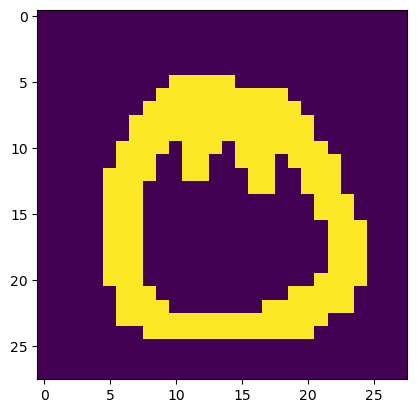

In [23]:
plt.imshow(bin_train_data_number1[1000].reshape(28,28))

In [24]:
# visualizing the data
# based on basic visuals i decided to choose sum of white pixels in binary
# form of the train pictures as my first feature
First_number_image_pixels = calcPixels(bin_train_data_number1);
Second_number_image_pixels = calcPixels(bin_train_data_number2);
# for my second feature i chose average of grayscale picture
First_number_image_AVG = calcAvg(train_data_number1);
Second_number_image_AVG = calcAvg(train_data_number2);


In [25]:
total_unlabeled_data = np.array([normalize(First_number_image_pixels + Second_number_image_pixels),normalize(First_number_image_AVG +Second_number_image_AVG)]).T
total_unlabeled_data[0]

array([0.44794953, 0.34959743])

Althogh both features were very similar its very interesting to see that they produced
noticable different result

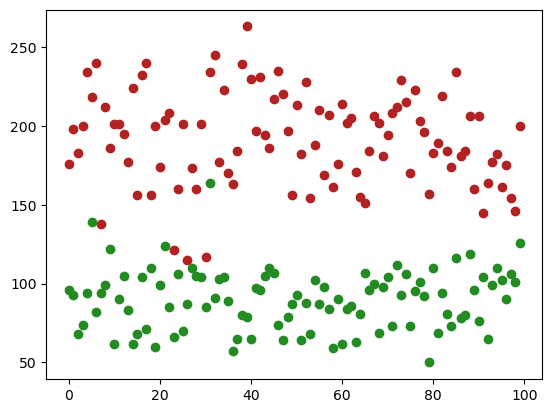

In [26]:
# visualizing the data pixels sum in graph form just to get the better idea of working
for i in zip(np.arange(100), First_number_image_pixels, Second_number_image_pixels ):
    plt.scatter(i[0], i[1], color= 'firebrick')
    plt.scatter(i[0], i[2], color= 'forestgreen')

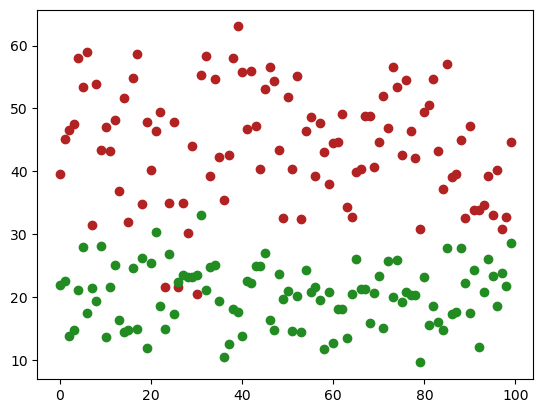

In [27]:
# visualizing the data average in graph form just to get the better idea of working
for i in zip(np.arange(100),First_number_image_AVG,Second_number_image_AVG ):
    plt.scatter(i[0], i[1], color= 'firebrick')
    plt.scatter(i[0], i[2], color= 'forestgreen')

In [28]:
# Kmeans
kmean = KMeans(
    init = 'random',
    n_clusters = 2,
    n_init = 10,
    max_iter = 100,
    random_state = 50  
)

In [29]:
kmean.fit(total_unlabeled_data)

C:\Users\Acer\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Acer\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


KMeans(init='random', max_iter=100, n_clusters=2, n_init=10, random_state=50)

In [30]:
kmean.cluster_centers_
kmean.n_iter_
kmean.labels_

array([0, 0, 0, ..., 1, 1, 1])

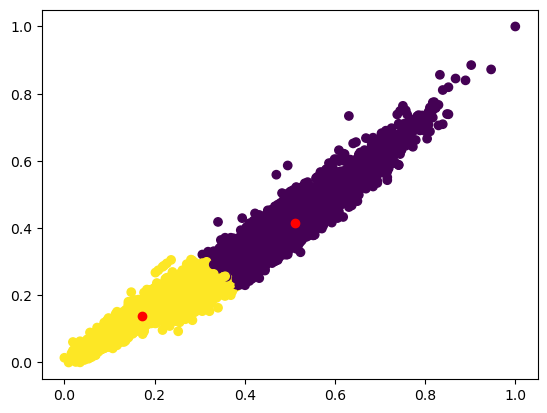

In [31]:
# 2 cluster centers can be seen and looking approximately at the right place
plt.scatter(total_unlabeled_data[:,0],total_unlabeled_data[:,1],c=kmean.labels_)
for i in kmean.cluster_centers_:
    plt.scatter(i[0],i[1],color = 'red')

In [32]:
# for testing purposes only
kmean.predict(total_unlabeled_data)

array([0, 0, 0, ..., 1, 1, 1])

In [33]:
confusion_matrix1 = confusion_matrix(train_data_labels,kmean.predict(total_unlabeled_data))
confusion_matrix1

array([[5385,  537],
       [ 102, 6639]], dtype=int64)

In my opinion feature extraction worked nicely in case of 0 and 1 because there is a lot
of difference in number of white/brighter color pixels between these two which made it easy to
segment the data. As far as accuracy goes our model is not perfect but i think
with knowing only these 2 features it was accurate enough

# Self created algorithm using tensorflow

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
# basic algorthm using tensorflow and evaluating its output
my_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # shape of the input
    keras.layers.Dense(728, activation=tf.nn.relu),  # number of neurons filtering null data
    keras.layers.Dense(10, activation=tf.nn.softmax)  # no of different type of data
])

In [36]:
# this basically runs epochs amount of time and each time it checks the loss
# restart the algorithm and try to improve it accordingly so each loop improves 
# the algorithm guessing capability a litle bit
my_model.compile(optimizer=tf.optimizers.Adam(), loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [41]:
# fitting data in our model
model_history = my_model.fit(train_images,train_labels,epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2726 - accuracy: 0.9549 - val_loss: 0.4779 - val_accuracy: 0.9439
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2726 - accuracy: 0.9563 - val_loss: 0.3668 - val_accuracy: 0.9545
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2548 - accuracy: 0.9588 - val_loss: 0.3832 - val_accuracy: 0.9526
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2260 - accuracy: 0.9616 - val_loss: 0.4507 - val_accuracy: 0.9475
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2095 - accuracy: 0.9651 - val_loss: 0.4320 - val_accuracy: 0.9511
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2016 - accuracy: 0.9644 - val_loss: 0.4396 - val_accuracy: 0.9477
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2082 - accuracy: 0.9671 - val_loss: 0.4606 - val_accuracy:

In [42]:
# evaluating the model for loss and accuracy on test data. I think the model worked really nice with the test data
my_model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5846 - accuracy: 0.9640


[0.5845856666564941, 0.9639999866485596]

In [43]:
def plt_accuracy_loss(history):
    fog = plt.figure(figsize=(10,5))
    
    #plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--',label='acc')
    plt.plot(history.history['val_accuracy'],'ro--',label='val_acc')
    plt.title("train accuracy vs val accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    
    #plot loss 
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--',label='loss')
    plt.plot(history.history['val_loss'],'ro--',label='val_loss')
    plt.title('train loss vs val loss')
    plt.ylabel("loss")
    plt.xlabel("epochs")
    
    plt.legend()
    plt.show()
    
    
    

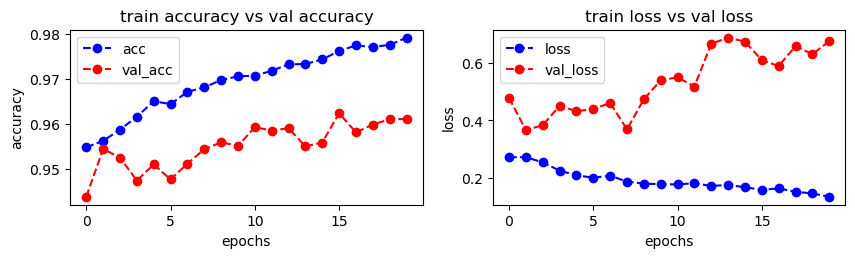

In [44]:
plt_accuracy_loss(model_history)

In [40]:
# the graph shows that 3 epochs were enough after that we are overfitting the model in terms of accuracy
# There is not significant diference in val loss well after 3 epochs 
# but overall i will say the model is pretty accurate 